In [6]:
import networkx as nx
import generator as gen
import simulate as sim
import conComp as cc
import random
import numpy as np
import mainMethods as mn


In [12]:
for i in range(50):
    g = gen.graph_gen(2,50,0.2,0.02)
    dev = [0.1] + [0.5] * 3
    std_devs = [dev, dev]
    changeVec = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
    cmat = gen.culture_init(g, std_devs, changeVec)
    g, culturemat = sim.simulate_iterstop(g,cmat)
    print(nx.average_shortest_path_length(g))

2.0314285714285716
2.2779591836734694
2.6640816326530614
2.6416326530612246
2.553469387755102
2.6044897959183673


NetworkXError: Graph is not weakly connected.

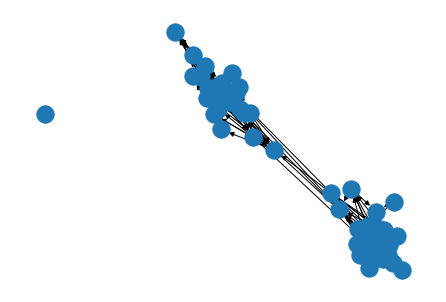

In [13]:
nx.draw(g)

In [10]:
d = 0.1
z = 10000/d
0.5 ** z
c = cmat[0]
print(c)
print(c[-3])

[ 1.21859725e+00  5.07581468e-01  6.52044725e-01  1.03739330e+00
 -5.96342238e-01 -7.12557149e-01  3.66724132e-01 -1.74839086e+00
 -1.74131193e-03 -8.79574509e-02  8.48995899e-01 -2.47845641e-02
  1.17318229e-01]
0.8489958985059245


In [4]:
print(l)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
